In [6]:
import pandas as pd
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd

file_path ="D:\FOSSEE internship task\FOSSEE_main_file_main.csv"
df = pd.read_csv(file_path)

df.head()

<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:3: SyntaxWarning: invalid escape sequence '\F'
C:\Users\nirup\AppData\Local\Temp\ipykernel_10176\2002742252.py:3: SyntaxWarning: invalid escape sequence '\F'
  file_path ="D:\FOSSEE internship task\FOSSEE_main_file_main.csv"


,Category,Activity_Data,Emission_Factor( kg CO2e/unit),Total_Emission(Kg),emmission_rate,Scope 3 Category,sum_emmision,Data Source,Relevance to Emissions Accounting
0,Purchased Goods and Services(steel),"1,000",1.9,1900,highest,0,0,0,0
1,Purchased Goods and Services(plastic),500,2.5,1250,highest,0,0,0,0
2,Purchased Goods and Services(textile),200,3.0,600,highest,Purchased Goods and Services,5460,GHG Protocol's Technical Guidance for Calculat...,Covers methodologies for assessing emissions f...
3,Purchased Goods and Services(paper),300,1.2,360,highest,0,0,0,0
4,Purchased Goods and Services(aluminum),150,9.0,1350,highest,0,0,0,0


In [10]:

df = pd.read_csv(file_path)

print("Original DataFrame:")
print(df.head())

columns_to_convert = ['Total_Emission(Kg)', 'Activity_Data']  
for column_to_convert in columns_to_convert:
    print(f"Data type of '{column_to_convert}' before conversion: {df[column_to_convert].dtype}")
    df[column_to_convert] = pd.to_numeric(df[column_to_convert], errors='coerce')
    df[column_to_convert] = df[column_to_convert].astype('Int64')
    print(f"Data type of '{column_to_convert}' after conversion: {df[column_to_convert].dtype}")
modified_csv_file_path = 'modified_file_FSSEE.csv'  
df.to_csv(modified_csv_file_path, index=False)  

print(f"Modified DataFrame has been saved as {modified_csv_file_path}.")

Original DataFrame:
                                 Category Activity_Data  \
0     Purchased Goods and Services(steel)         1,000   
1   Purchased Goods and Services(plastic)           500   
2   Purchased Goods and Services(textile)           200   
3     Purchased Goods and Services(paper)           300   
4  Purchased Goods and Services(aluminum)           150   

   Emission_Factor( kg CO2e/unit) Total_Emission(Kg) emmission_rate  \
0                             1.9               1900        highest   
1                             2.5               1250        highest   
2                             3.0                600        highest   
3                             1.2                360        highest   
4                             9.0               1350        highest   

               Scope 3 Category  sum_emmision  \
0                             0             0   
1                             0             0   
2  Purchased Goods and Services          5460   
3 

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Category                           50 non-null     object 
 1   Activity_Data                      23 non-null     Int64  
 2   Emission_Factor( kg CO2e/unit)     50 non-null     float64
 3   Total_Emission(Kg)                 49 non-null     Int64  
 4   emmission_rate                     50 non-null     object 
 5   Scope 3 Category                   50 non-null     object 
 6   sum_emmision                       50 non-null     int64  
 7   Data Source                        50 non-null     object 
 8   Relevance to Emissions Accounting  50 non-null     object 
dtypes: Int64(2), float64(1), int64(1), object(5)
memory usage: 3.7+ KB


In [12]:
def generate_sql_schema(df, table_name):
    sql_schema = f"CREATE TABLE {table_name} (\n"
    
    for column in df.columns:
        if pd.api.types.is_integer_dtype(df[column]):
            sql_type = "INTEGER"
        elif pd.api.types.is_float_dtype(df[column]):
            sql_type = "FLOAT"
        elif pd.api.types.is_string_dtype(df[column]):
            sql_type = "VARCHAR(255)"  
        elif pd.api.types.is_datetime64_any_dtype(df[column]):
            sql_type = "DATETIME"
        else:
            sql_type = "TEXT"  
        sql_schema += f"    {column} {sql_type},\n"
    sql_schema = sql_schema.rstrip(",\n") + "\n);"
    return sql_schema

table_name = 'scope3_table_name'  
sql_schema = generate_sql_schema(df, table_name)
print(sql_schema)

CREATE TABLE scope3_table_name (
    Category VARCHAR(255),
    Activity_Data INTEGER,
    Emission_Factor( kg CO2e/unit) FLOAT,
    Total_Emission(Kg) INTEGER,
    emmission_rate VARCHAR(255),
    Scope 3 Category VARCHAR(255),
    sum_emmision INTEGER,
    Data Source VARCHAR(255),
    Relevance to Emissions Accounting VARCHAR(255)
);


<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\nirup\AppData\Local\Temp\ipykernel_10176\2337857378.py:1: SyntaxWarning: invalid escape sequence '\F'
  file_path = "D:\FOSSEE internship task\FOSSEE_main_file_main.csv"


Original DataFrame:
                                 Category Activity_Data  \
0     Purchased Goods and Services(steel)         1,000   
1   Purchased Goods and Services(plastic)           500   
2   Purchased Goods and Services(textile)           200   
3     Purchased Goods and Services(paper)           300   
4  Purchased Goods and Services(aluminum)           150   

   Emission_Factor( kg CO2e/unit) Total_Emission(Kg) emmission_rate  \
0                             1.9               1900        highest   
1                             2.5               1250        highest   
2                             3.0                600        highest   
3                             1.2                360        highest   
4                             9.0               1350        highest   

               Scope 3 Category  sum_emmision  \
0                             0             0   
1                             0             0   
2  Purchased Goods and Services          5460   
3 

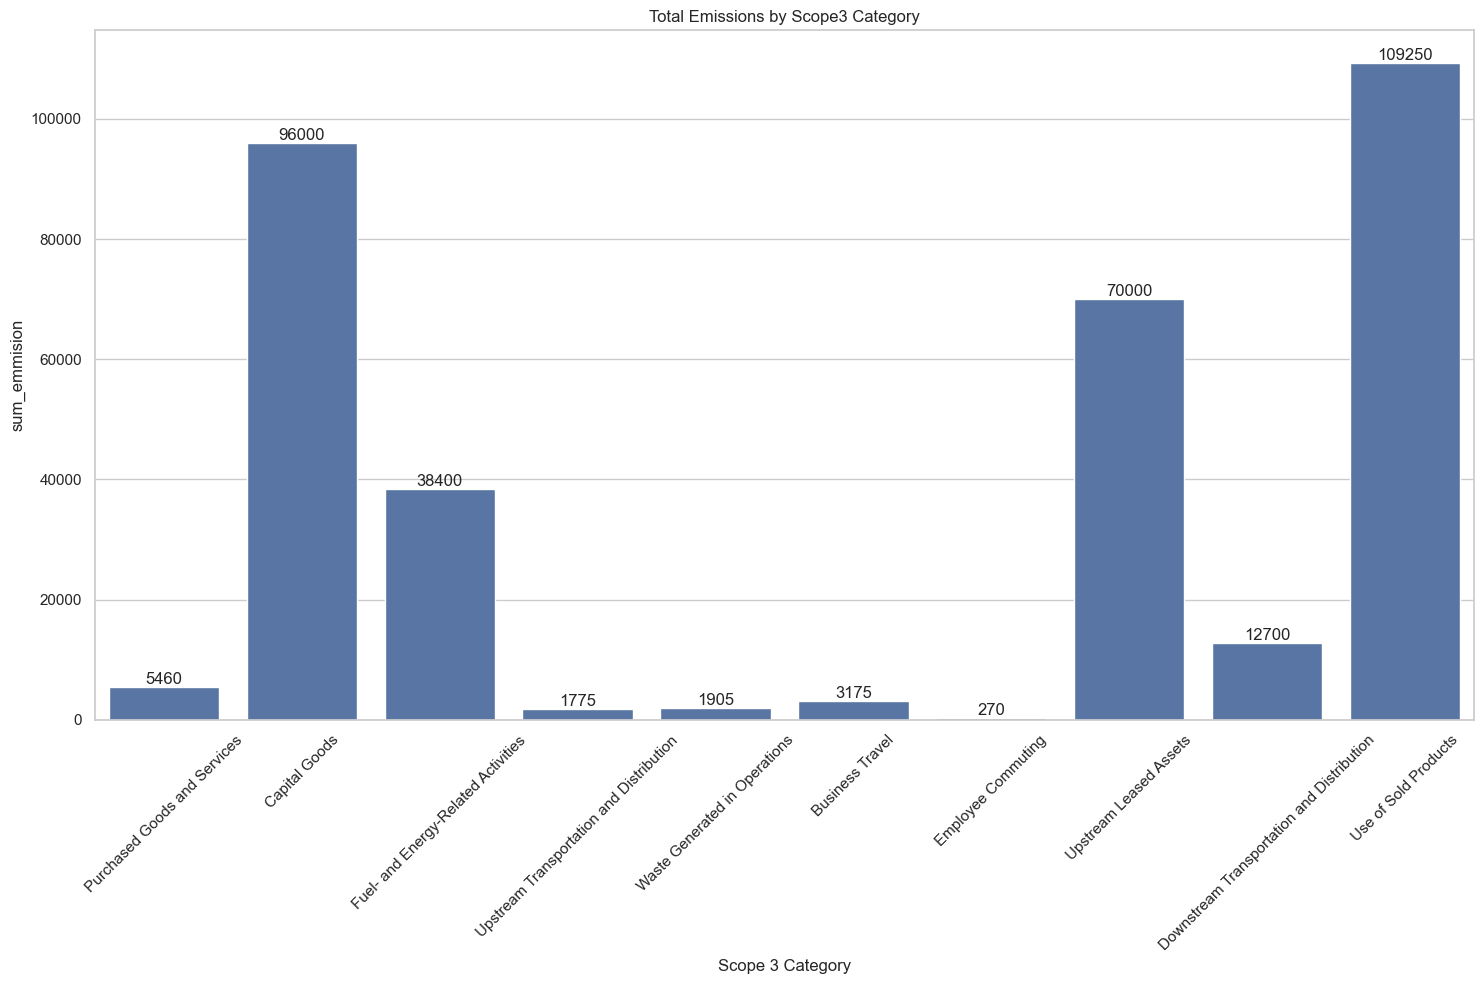

In [7]:

file_path = "D:\FOSSEE internship task\FOSSEE_main_file_main.csv"
df = pd.read_csv(file_path)
print("Original DataFrame:")
print(df.head())
df_filtered = df[df['sum_emmision'] > 0]
num_categories = df_filtered.shape[0]
fig_width = max(10, num_categories * 1.5)  
fig_height = 10 # Fixed height
# Set the style for the plot
sns.set(style="whitegrid")
# Creating a bar chart for total emissions by category
plt.figure(figsize=(fig_width, fig_height))
sns.barplot(x='Scope 3 Category', y='sum_emmision', data=df_filtered)
# Adding the total emissions for each category
for index, value in enumerate(df_filtered['sum_emmision']):
    plt.text(index, value, f'{value}', ha='center', va='bottom') 

plt.title('Total Emissions by Scope3 Category')
plt.xlabel('Scope 3 Category')
plt.ylabel('sum_emmision')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Original DataFrame:
                                 Category Activity_Data  \
0     Purchased Goods and Services(steel)         1,000   
1   Purchased Goods and Services(plastic)           500   
2   Purchased Goods and Services(textile)           200   
3     Purchased Goods and Services(paper)           300   
4  Purchased Goods and Services(aluminum)           150   

   Emission_Factor( kg CO2e/unit) Total_Emission(Kg) emmission_rate  \
0                             1.9               1900        highest   
1                             2.5               1250        highest   
2                             3.0                600        highest   
3                             1.2                360        highest   
4                             9.0               1350        highest   

               Scope 3 Category  sum_emmision  \
0                             0             0   
1                             0             0   
2  Purchased Goods and Services          5460   
3 

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\nirup\AppData\Local\Temp\ipykernel_10176\2350435654.py:1: SyntaxWarning: invalid escape sequence '\F'
  file_path = "D:\FOSSEE internship task\FOSSEE_main_file_main.csv"


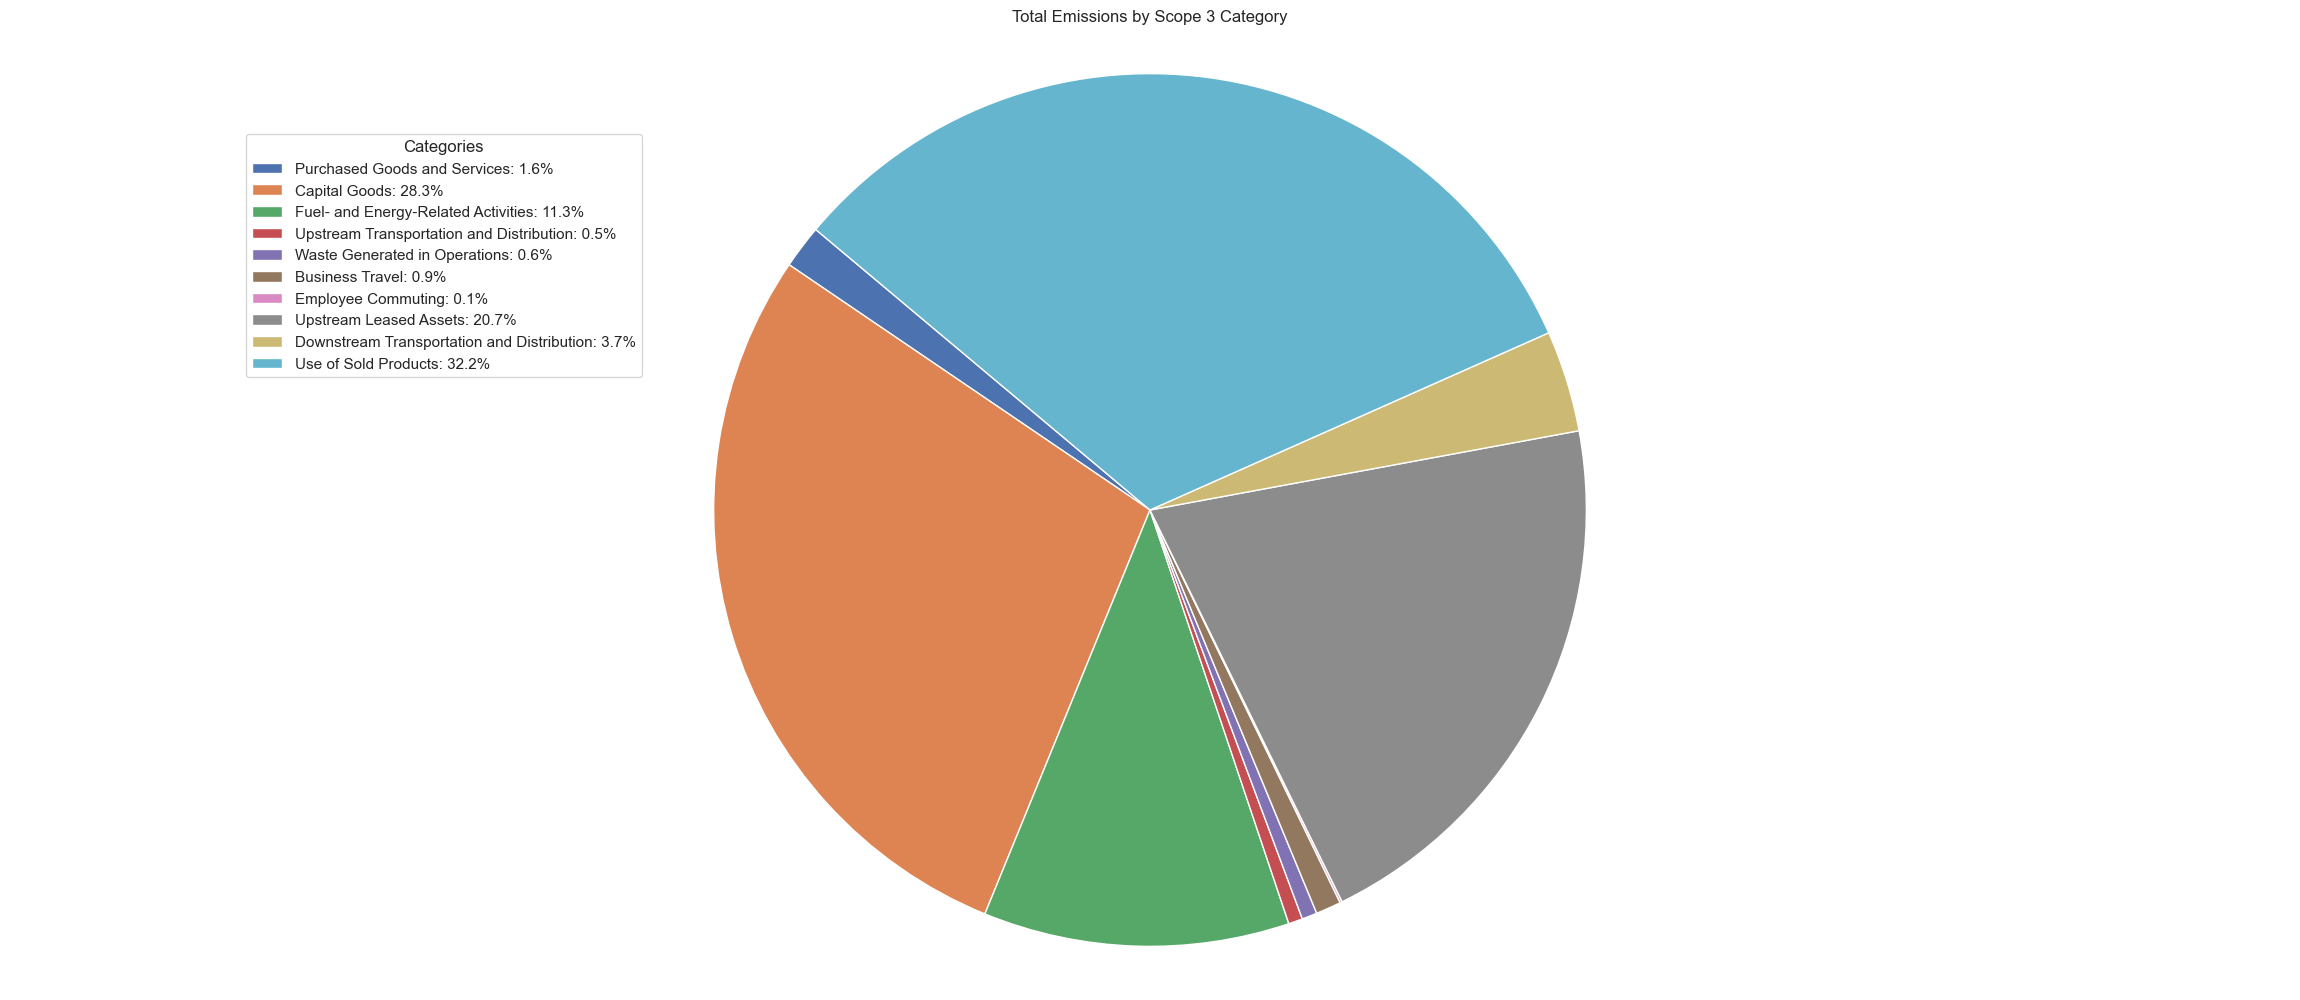

In [8]:

file_path = "D:\FOSSEE internship task\FOSSEE_main_file_main.csv"  
df = pd.read_csv(file_path)
print("Original DataFrame:")
print(df.head())
df_filtered = df[df['sum_emmision'] > 0]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 12)) 
wedges, texts = plt.pie(df_filtered['sum_emmision'],  
                        startangle=140)
plt.title('Total Emissions by Scope 3 Category')
#Calculate percentages for the legend
percentages = [f'{(value / df_filtered["sum_emmision"].sum()) * 100:.1f}%' for value in df_filtered['sum_emmision']]
#Adding a legend box with percentages
plt.legend(wedges, [f'{label}: {percent}' for label, percent in zip(df_filtered['Scope 3 Category'], percentages)], 
           title="Categories", loc="upper left", bbox_to_anchor=(0.1, 0.9))
#to add more space around the pie chart
plt.subplots_adjust(left=0.1, right=2, top=0.9, bottom=0.1)
plt.axis('equal')  #Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()